# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Understand Data Structure

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Check for Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

# Handle Missing Values

In [6]:
df_original = df.copy()  
df = df.dropna()

print("Shape before cleaning:", df_original.shape)
print("Shape after removing NA:", df.shape)

Shape before cleaning: (200000, 9)
Shape after removing NA: (199999, 9)


# Compare Before vs After Cleaning

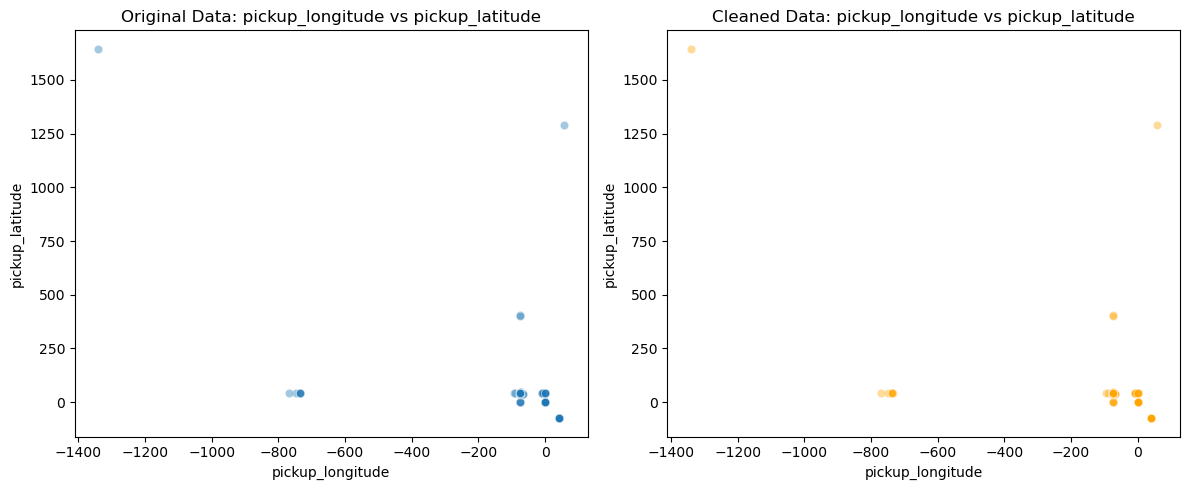

In [7]:
def plot_scatter(df1, df2, x, y):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df1[x], y=df1[y], alpha=0.4)
    plt.title(f'Original Data: {x} vs {y}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df2[x], y=df2[y], alpha=0.4, color='orange')
    plt.title(f'Cleaned Data: {x} vs {y}')

    plt.tight_layout()
    plt.show()

plot_scatter(df_original, df, 'pickup_longitude', 'pickup_latitude')


# Datetime Conversion & Feature Extraction

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek

# Drop Unnecessary Columns

In [9]:
cols_to_drop = ['Unnamed: 0', 'key', 'pickup_datetime']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Create Distance Feature (Haversine Formula)

In [10]:
def haversine(lon1, lon2, lat1, lat2):
    lon1, lon2, lat1, lat2 = map(np.radians, [lon1, lon2, lat1, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  
    return km

df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'],
                           df['pickup_latitude'], df['dropoff_latitude']).round(2)

df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.46
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3,4.48


# Handle Outliers

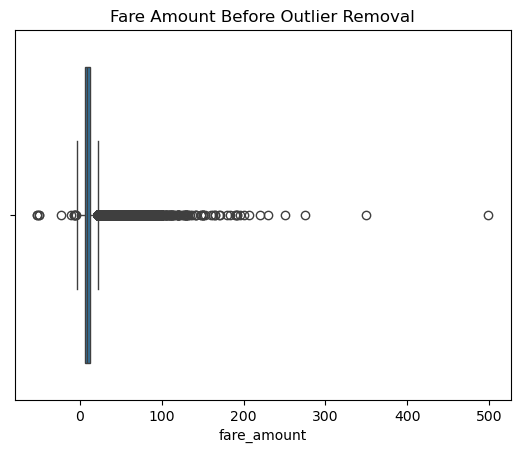

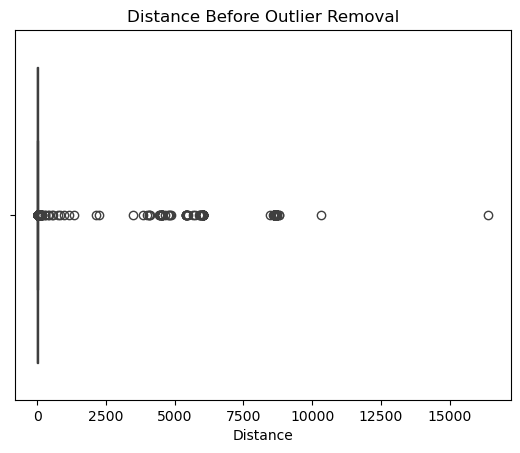

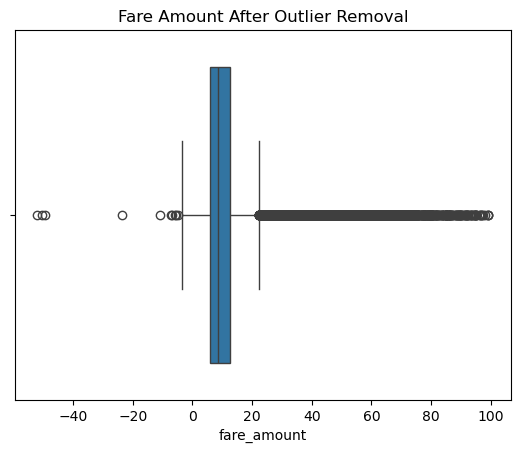

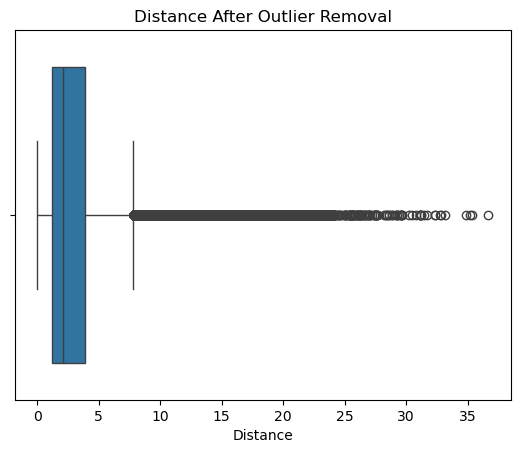

In [11]:
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Before Outlier Removal")
plt.show()

sns.boxplot(x=df['Distance'])
plt.title("Distance Before Outlier Removal")
plt.show()

df = df[(df['Distance'] <= 60) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 10)]

sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount After Outlier Removal")
plt.show()

sns.boxplot(x=df['Distance'])
plt.title("Distance After Outlier Removal")
plt.show()


# Drop Unneeded Location Columns

In [12]:
df = df.drop(columns=['pickup_longitude','dropoff_longitude'])

# Prepare Features and Target

In [13]:
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Numerical Features

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model: Fixed-Effects Panel Regression


In [16]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

df_panel = df.set_index(['pickup_day', 'pickup_hour'])

y_panel = df_panel['fare_amount']
X_panel = df_panel[['Distance', 'passenger_count', 'pickup_month']]
X_panel = sm.add_constant(X_panel)

fe_model = PanelOLS(y_panel, X_panel, entity_effects=True)
fe_results = fe_model.fit()

print(fe_results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            fare_amount   R-squared:                        0.7382
Estimator:                   PanelOLS   R-squared (Between):              0.8079
No. Observations:              198712   R-squared (Within):               0.7382
Date:                Fri, Nov 14 2025   R-squared (Overall):              0.7382
Time:                        20:24:28   Log-likelihood                -5.944e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.867e+05
Entities:                          31   P-value                           0.0000
Avg Obs:                       6410.1   Distribution:                F(3,198678)
Min Obs:                       3710.0                                           
Max Obs:                       6869.0   F-statistic (robust):          1.867e+05
                            

# Try Multiple Models for Comparison

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    preds = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    results.append([name, r2, mae, rmse])

ml_results = pd.DataFrame(results, columns=["Model", "R2", "MAE", "RMSE"])
ml_results


,Model,R2,MAE,RMSE
0,Decision Tree,0.608081,2.850803,5.889976
1,Random Forest,0.813001,2.028306,4.068510
2,Gradient Boosting,0.800033,2.071536,4.207213


# Formal Model Comparison


In [21]:
fe_r2 = fe_results.rsquared
fe_pred = fe_results.fitted_values.reindex(y_panel.index)
fe_mae = mean_absolute_error(y_panel, fe_pred)
fe_rmse = np.sqrt(mean_squared_error(y_panel, fe_pred))
comparison = pd.concat([
    pd.DataFrame([["Fixed Effects", fe_r2, fe_mae, fe_rmse]],
                 columns=["Model", "R2", "MAE", "RMSE"]),
    ml_results
], ignore_index=True)

print(comparison)


               Model        R2       MAE      RMSE
0      Fixed Effects  0.738203  2.531192  4.819451
1      Decision Tree  0.608081  2.850803  5.889976
2      Random Forest  0.813001  2.028306  4.068510
3  Gradient Boosting  0.800033  2.071536  4.207213


# Add a Deep Learning Model

In [22]:
from tensorflow import keras

model_dl = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model_dl.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=256, verbose=1)

test_loss, test_mae = model_dl.evaluate(X_test_scaled, y_test)
print(f"Deep Learning MAE: {test_mae:.2f}")


D:\Git\New folder\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 40.4460 - mae: 3.4866 - val_loss: 20.2980 - val_mae: 2.3824
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.9638 - mae: 2.5098 - val_loss: 19.7376 - val_mae: 2.2447
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.2011 - mae: 2.4424 - val_loss: 19.2547 - val_mae: 2.2774
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.5129 - mae: 2.3991 - val_loss: 19.1084 - val_mae: 2.2660
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.1207 - mae: 2.3770 - val_loss: 18.9224 - val_mae: 2.2530
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.8474 - mae: 2.3534 - val_loss: 18.9791 - val_mae: 2.2819
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.5633 - mae: 2.3339 - val_loss: 18.6269 - val_mae: 2.1705
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.4130 - mae: 2.3185 - val_loss: 18.4640 - val_mae: 2.2105
Epoch 9/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluate & Compare All Models Nicely

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=['Model', 'R2_Score', 'MAE', 'RMSE'])
results_df = results_df.sort_values(by='R2_Score', ascending=False).reset_index(drop=True)

results_df.style.background_gradient(cmap='YlGnBu')

,Model,R2_Score,MAE,RMSE
0,Random Forest,0.813001,2.028306,4.068510
1,Gradient Boosting,0.800033,2.071536,4.207213
2,Support Vector Regressor,0.766468,2.099658,4.546617
3,Ridge Regression,0.750521,2.384685,4.699290
4,Linear Regression,0.750521,2.384683,4.699290
5,K-Nearest Neighbors,0.737886,2.563282,4.816823
6,Lasso Regression,0.719542,2.692942,4.982521
7,Decision Tree,0.608081,2.850803,5.889976
8,AdaBoost,-1.033370,11.881795,13.416024


# Visualize Model Accuracy Comparison

C:\Users\HP\AppData\Local\Temp\ipykernel_4288\1815332847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score', y='Model', data=results_df, palette='viridis')


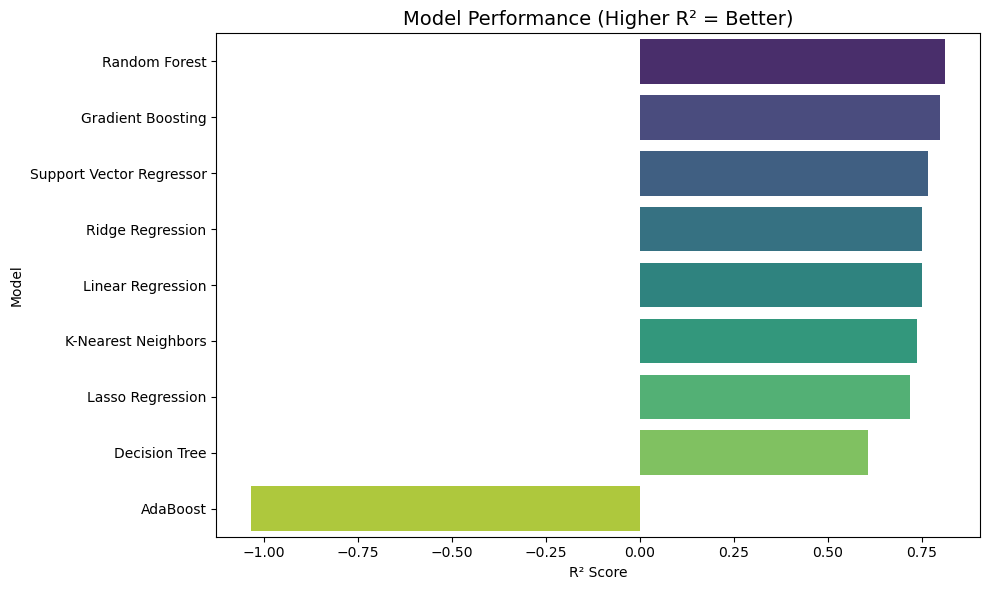

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='R2_Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance (Higher R² = Better)', fontsize=14)
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Model Error Visualization

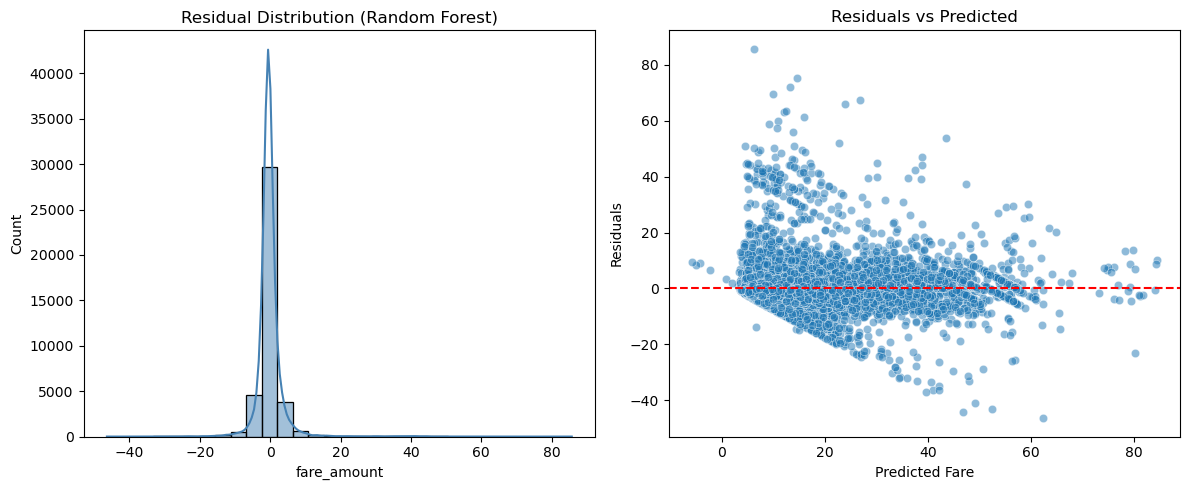

In [25]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

residuals = y_test - y_pred_best

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color='steelblue')
plt.title(f'Residual Distribution ({best_model_name})')

plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Feature Importance (Tree-Based Models Only)

C:\Users\HP\AppData\Local\Temp\ipykernel_4288\2548742318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='coolwarm')


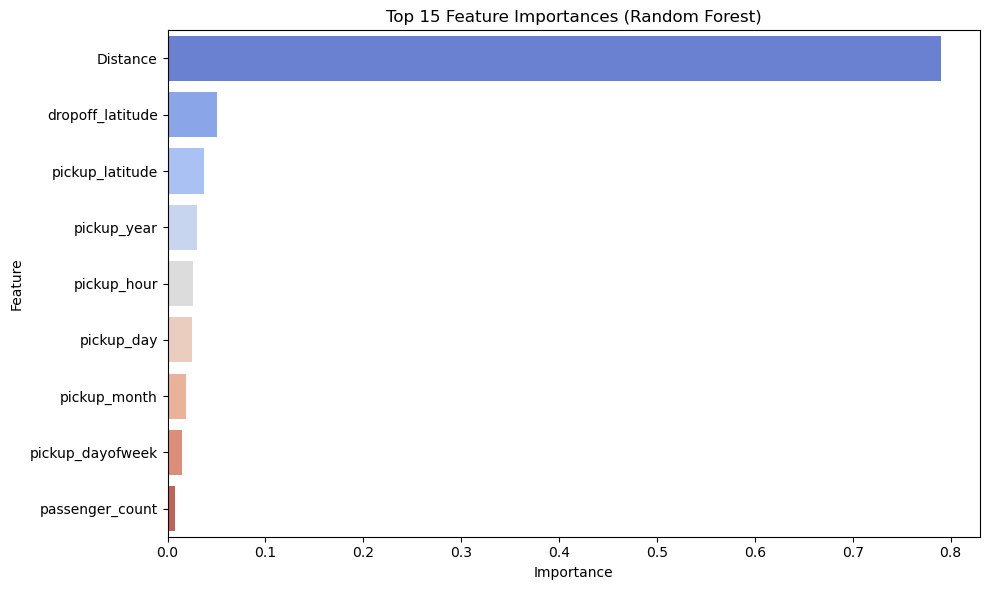

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='coolwarm')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Correlation Heatmap

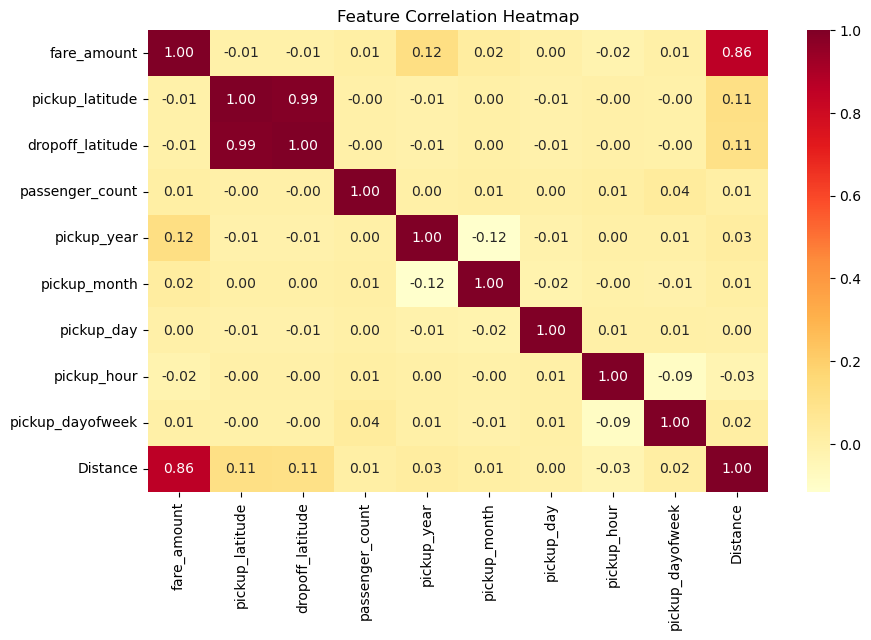

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Add Fancy Scatterplot with Regression Line

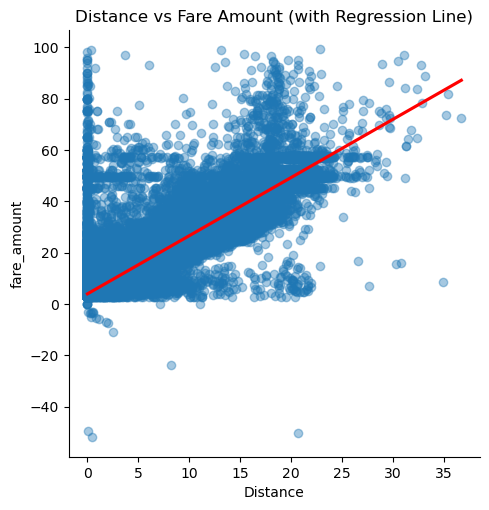

In [28]:
sns.lmplot(x='Distance', y='fare_amount', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Distance vs Fare Amount (with Regression Line)')
plt.show()

# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import KFold, RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}
rf = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    scoring='r2',
    verbose=1
)
rf_search.fit(X_train, y_train)

print("Best Parameters:", rf_search.best_params_)
print("Best Cross-Val R2:", rf_search.best_score_)

best_rf = rf_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Best Cross-Val R2: 0.8199949984527823


# Evaluation on test Data

In [30]:
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Model Performance on Test Set ---")
print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)



--- Final Model Performance on Test Set ---
R2 Score: 0.8199057671743315
MAE: 1.9525463287706086
RMSE: 3.9926888683039783


# Save Best Model

In [31]:
import pickle

pickle.dump(best_rf,open("random_forest_model.pkl",'wb'))
print("Random Forest model saved successfully!")

Random Forest model saved successfully!
